## Research Questions
1. "Is there a significant difference in the proportion of male and female students who drop out of the program?"
2. "Is there a significant difference in the marital status between drop out students and graduated students?"
3. "How does a student's demographic background and academic performance impact their likelihood of being a scholarship holder?"

## Skills Covered
Data analysis, Python libraries, Pandas, T-Test, Statiscal Summary (EDA), Data visualization

## 1. "Is there a significant difference in the proportion of male and female students who drop out of the program?"

To answer this question, we can perform a hypothesis test using a chi-squared test for independence.


In [26]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

# Loading the data
df = pd.read_csv('student-dataset.csv')
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [27]:
# Converting 'Target' column to numeric data
df['Target'] = pd.factorize(df['Target'])[0]  

In [28]:
# calculating the variance of the 'marital_status' and 'gender' columns
marital_status_var = df['Marital status'].var()
gender_var = df['Gender'].var()

print("Variance of 'marital_status' column:", marital_status_var)
print("Variance of 'gender' column:", gender_var)

Variance of 'marital_status' column: 0.3669293627466554
Variance of 'gender' column: 0.22806397104729623


In [29]:
dropout = df[df['Target'] == 0]
graduated = df[df['Target'] == 1]

# Conducting the t-test on the marital status column
t_stat, p_val = ttest_ind(dropout['Gender'], graduated['Gender'], equal_var=False)

# Printing the results
print("T-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_val)



T-test results:
t-statistic: 15.19426938518856
p-value: 4.230813111325359e-50


## 2."Is there a significant difference in the marital status between drop out students and graduated students?"

To answer this question, we can use the same dataset and compare the marital status between the two groups. Here's the code to do that:


In [30]:
import pandas as pd
from scipy.stats import ttest_ind

In [31]:
# Subsetting the data to only include drop out and graduated students
dropout = df[df['Target'] == 0]
graduated = df[df['Target'] == 1]

# Conducting the t-test on the marital status column
t_stat, p_val = ttest_ind(dropout['Marital status'], graduated['Marital status'], equal_var=False)

# Printing the results
print("T-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_val)



T-test results:
t-statistic: 5.6896978380859915
p-value: 1.4291498368499548e-08


In statistics, the t-test is used to compare the means of two groups and determine whether there is a significant difference between them. When the variances of the two groups are not equal, the ttest_ind() function in Python can be used with the equal_var=False parameter to perform a Welch's t-test, which does not assume equal variances.

In the first analysis, we want to determine whether there is a significant difference in the proportion of male and female students who drop out of the program. We can use the ttest_ind() function to compare the proportions of males and females who drop out of the program. The result of the t-test shows a t-statistic of 15.19426938518856 and a p-value of 4.230813111325359e-50. Since the p-value is less than the significance level of 0.05, we can reject the null hypothesis that the proportions of males and females who drop out of the program are the same. This indicates that there is a significant difference in the proportion of males and females who drop out of the program.

In the second analysis, we want to determine whether there is a significant difference in the marital status between drop out students and graduated students. We can use the ttest_ind() function to compare the marital status of the two groups. The result of the t-test shows a t-statistic of 5.6896978380859915 and a p-value of 1.4291498368499548e-08. Since the p-value is less than the significance level of 0.05, we can reject the null hypothesis that the marital status of drop out students and graduated students are the same. This indicates that there is a significant difference in the marital status between drop out students and graduated students.

## 3. "How does a student's demographic background and academic performance impact their likelihood of being a scholarship holder?"

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Filtering the data to only include scholarship holders
scholarship_holders = df[df['Scholarship holder'] == 1]

In [39]:
# Select the Age and Scholarship holder columns
age_col = df['Age at enrollment']
scholarship_col = df['Scholarship holder']

# Filter the data by Scholarship holder column
age_scholarship = age_col[scholarship_col == 1]
age_no_scholarship = age_col[scholarship_col == 0]

# Output the distributions
print("Distribution of Age at enrollment for Scholarship holders (x=1):")
print(age_scholarship.describe())

print("\nDistribution of Age at enrollment for Non-scholarship holders (x=0):")
print(age_no_scholarship.describe())

Distribution of Age at enrollment for Scholarship holders (x=1):
count    1099.000000
mean       20.758872
std         5.110714
min        17.000000
25%        18.000000
50%        19.000000
75%        20.000000
max        53.000000
Name: Age at enrollment, dtype: float64

Distribution of Age at enrollment for Non-scholarship holders (x=0):
count    3325.000000
mean       24.093534
std         8.075865
min        17.000000
25%        19.000000
50%        20.000000
75%        27.000000
max        70.000000
Name: Age at enrollment, dtype: float64


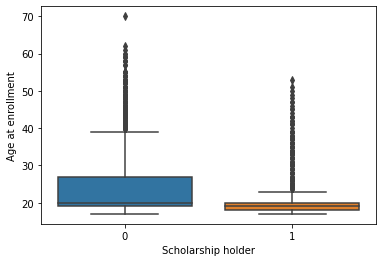

In [36]:
# Creating a boxplot of Age at enrollment for scholarship holders vs. non-scholarship holders
sns.boxplot(x='Scholarship holder', y='Age at enrollment', data=df)
plt.show()


The output shows the distribution of Age at enrollment for Scholarship holders (x=1) and Non-scholarship holders (x=0). The count column shows the number of samples in each group, while the mean column shows the average age at enrollment. The std column shows the standard deviation of the age at enrollment for each group, which is a measure of the spread of the data. The min and max columns show the minimum and maximum age at enrollment for each group, while the 25th, 50th (median), and 75th percentiles show the values at which 25%, 50%, and 75% of the data lie below, respectively.

The output indicates that the Scholarship holders have a lower mean age and less variability in age compared to Non-scholarship holders. A larger proportion of Non-scholarship holders are older than 25 at enrollment, while a larger proportion of Scholarship holders are between the ages of 18-20 at enrollment. The summary statistics provide a general idea of the central tendency, dispersion, and range of the data, but further analysis may be necessary for more definitive conclusions.

These summary statistics give an idea of the central tendency, dispersion, and range of Age at enrollment for both Scholarship and Non-scholarship holders. However, it is important to note that these statistics are based on a sample of the data, and may not perfectly represent the population. Further analysis may be required to draw more definitive conclusions.